In [103]:
from datetime import datetime

In [104]:
def convert(str):
    date_obj = datetime.strptime(str, "%Y-%m-%d")
    date_int = int(date_obj.timestamp())
    return date_int

In [105]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None

In [106]:
df = pd.read_csv('bitcoin_prices.csv')
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
limit = datetime(2020,12,31)
start = datetime(2019,1,1)
df = df[(df['Date'] <= limit )]
df = df[(df['Date'] >= start)]

In [107]:
df.head(5)

,Date,Close
3090,2019-01-01,3880.15
3091,2019-01-02,3961.01
3092,2019-01-03,3835.86
3093,2019-01-04,3874.06
3094,2019-01-05,3855.39


In [108]:
df.tail(5)

,Date,Close
3816,2020-12-27,26249.27
3817,2020-12-28,27039.45
3818,2020-12-29,27360.78
3819,2020-12-30,28889.61
3820,2020-12-31,28972.40


In [109]:
df['Close'] = df['Close'].apply(np.log10)

In [110]:
df

,Date,Close
3090,2019-01-01,3.588849
3091,2019-01-02,3.597806
3092,2019-01-03,3.583863
3093,2019-01-04,3.588166
3094,2019-01-05,3.586068
...,...,...
3816,2020-12-27,4.419117
3817,2020-12-28,4.431998
3818,2020-12-29,4.437128
3819,2020-12-30,4.460742


In [111]:
# download the data
y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

# generate the input and output sequences
n_lookback = 200  # length of input sequences (lookback period)
n_forecast = 365  # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

In [112]:
print(X)

[[[0.06483275]
  [0.07442654]
  [0.05949277]
  ...
  [0.49084147]
  [0.53397772]
  [0.52934581]]

 [[0.07442654]
  [0.05949277]
  [0.06410211]
  ...
  [0.53397772]
  [0.52934581]
  [0.53924146]]

 [[0.05949277]
  [0.06410211]
  [0.06185503]
  ...
  [0.52934581]
  [0.53924146]
  [0.53171433]]

 ...

 [[0.44009358]
  [0.44855515]
  [0.4551086 ]
  ...
  [0.35983993]
  [0.36510351]
  [0.35461063]]

 [[0.44855515]
  [0.4551086 ]
  [0.47323562]
  ...
  [0.36510351]
  [0.35461063]
  [0.35134839]]

 [[0.4551086 ]
  [0.47323562]
  [0.46038986]
  ...
  [0.35461063]
  [0.35134839]
  [0.3517406 ]]]


In [113]:
# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
6/6 [==============================] - 17s 229ms/step - loss: 0.2145
Epoch 2/10
6/6 [==============================] - 1s 180ms/step - loss: 0.1750
Epoch 3/10
6/6 [==============================] - 1s 191ms/step - loss: 0.0808
Epoch 4/10
6/6 [==============================] - 1s 151ms/step - loss: 0.0402
Epoch 5/10
6/6 [==============================] - 1s 195ms/step - loss: 0.0146
Epoch 6/10
6/6 [==============================] - 1s 188ms/step - loss: 0.0102
Epoch 7/10
6/6 [==============================] - 1s 197ms/step - loss: 0.0089
Epoch 8/10
6/6 [==============================] - 1s 199ms/step - loss: 0.0075
Epoch 9/10
6/6 [==============================] - 1s 238ms/step - loss: 0.0066
Epoch 10/10
6/6 [==============================] - 1s 219ms/step - loss: 0.0062


In [114]:
# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

1/1 [==============================] - 1s 929ms/step


In [115]:
Y_

array([[3.962028 ],
       [3.952879 ],
       [3.987331 ],
       [3.9410422],
       [3.9398942],
       [3.9297967],
       [3.9445658],
       [3.93585  ],
       [3.954122 ],
       [3.96     ],
       [3.9287932],
       [3.9556887],
       [3.96079  ],
       [3.9663804],
       [3.9545856],
       [3.9538295],
       [3.932817 ],
       [3.941475 ],
       [3.9604359],
       [3.9411457],
       [3.9729676],
       [3.9404004],
       [3.940611 ],
       [3.9385176],
       [3.9496076],
       [3.937051 ],
       [3.9215746],
       [3.9451258],
       [3.944319 ],
       [3.9360147],
       [3.9219842],
       [3.9245844],
       [3.9097962],
       [3.917327 ],
       [3.953713 ],
       [3.9272292],
       [3.9411366],
       [3.9392054],
       [3.9298499],
       [3.9168563],
       [3.9294398],
       [3.9421728],
       [3.9159164],
       [3.9255588],
       [3.925281 ],
       [3.944471 ],
       [3.9200468],
       [3.8722622],
       [3.9333107],
       [3.9388363],


In [116]:
# organize the results in a data frame
df_past = df[['Date']]
df_past['Close'] = df[['Close']]
df_past.rename(columns={'Close': 'Actual'}, inplace=True)
df_past = df_past.reset_index()
df_past = df_past.drop('index', axis=1)
print(df_past)

          Date    Actual
0   2019-01-01  3.588849
1   2019-01-02  3.597806
2   2019-01-03  3.583863
3   2019-01-04  3.588166
4   2019-01-05  3.586068
..         ...       ...
726 2020-12-27  4.419117
727 2020-12-28  4.431998
728 2020-12-29  4.437128
729 2020-12-30  4.460742
730 2020-12-31  4.461984

[731 rows x 2 columns]


In [117]:
# Forecast
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

/tmp/ipykernel_12873/805656776.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = df_past.append(df_future).set_index('Date')


In [118]:
df_real = pd.read_csv('bitcoin_prices.csv')
df_real['Date'] = df_real['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df_real = df_real[(df_real['Date'] <= datetime(2021,12,31) )]
df_real = df_real[(df_real['Date'] >= datetime(2021,1,1))]

In [119]:
df_real

,Date,Close
3821,2021-01-01,29388.94
3822,2021-01-02,32203.64
3823,2021-01-03,33063.48
3824,2021-01-04,32030.55
3825,2021-01-05,34038.29
...,...,...
4181,2021-12-27,50714.73
4182,2021-12-28,47536.39
4183,2021-12-29,46471.70
4184,2021-12-30,47129.66


In [120]:
results['Actual'] = results['Actual'].apply(np.log10)
results['Forecast'] = results['Forecast'].apply(np.log10)

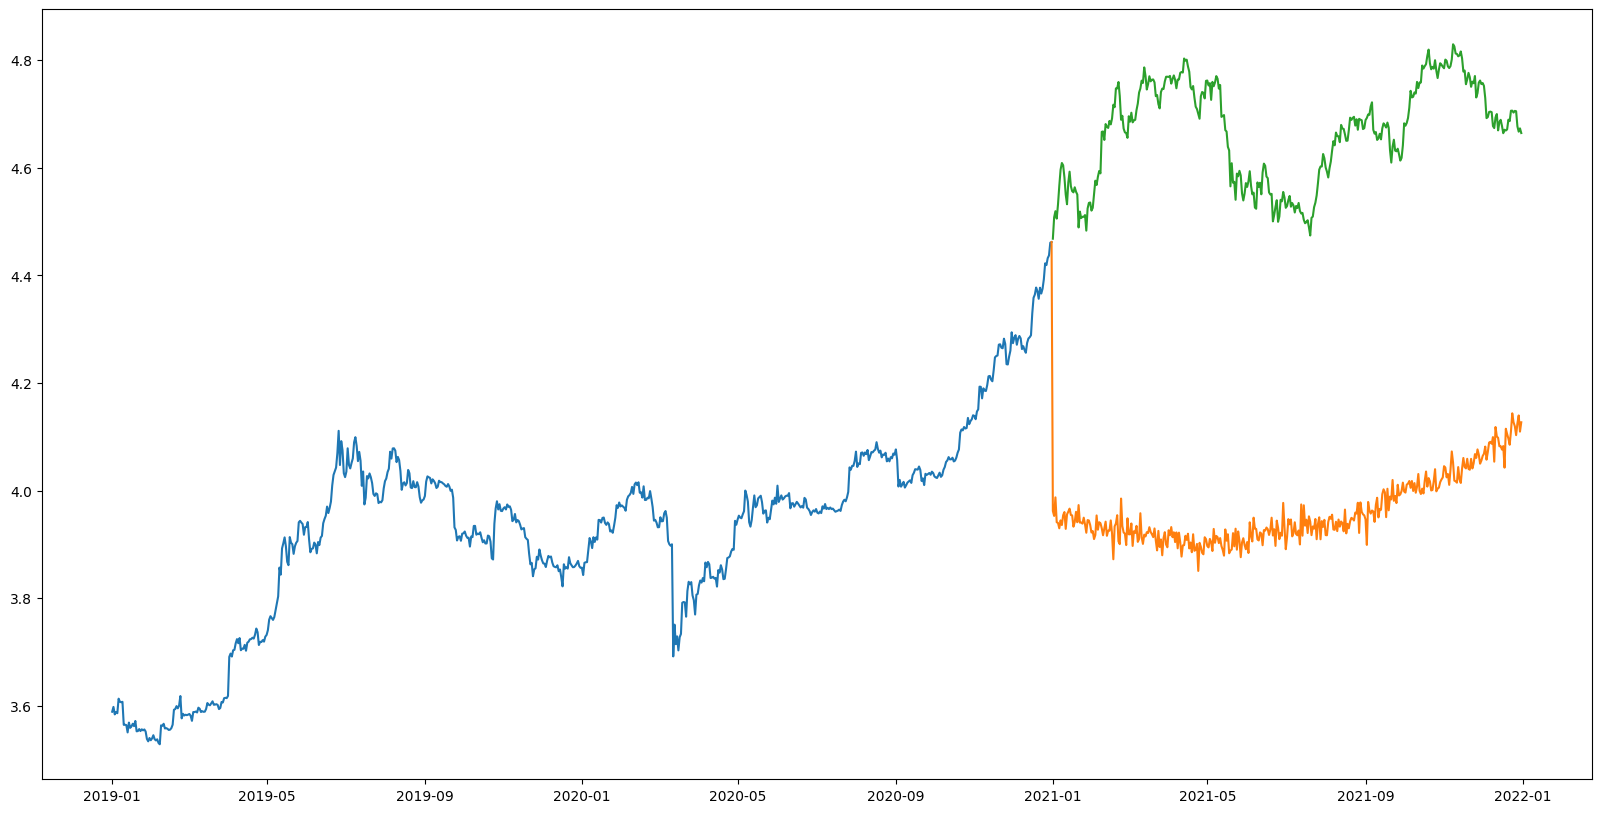

In [126]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(results)
plt.plot(df_real['Date'], df_real['Close'].apply(np.log10))

In [128]:
results['Actual'] = results['Actual'].apply(lambda x: 10**x)
results['Forecast'] = results['Forecast'].apply(lambda x: 10**x)

In [129]:
results

,Actual,Forecast
Date,,
2019-01-01,3880.15,NaN
2019-01-02,3961.01,NaN
2019-01-03,3835.86,NaN
2019-01-04,3874.06,NaN
2019-01-05,3855.39,NaN
...,...,...
2021-12-27,NaN,12676.801815
2021-12-28,NaN,13330.471317
2021-12-29,NaN,13789.841326


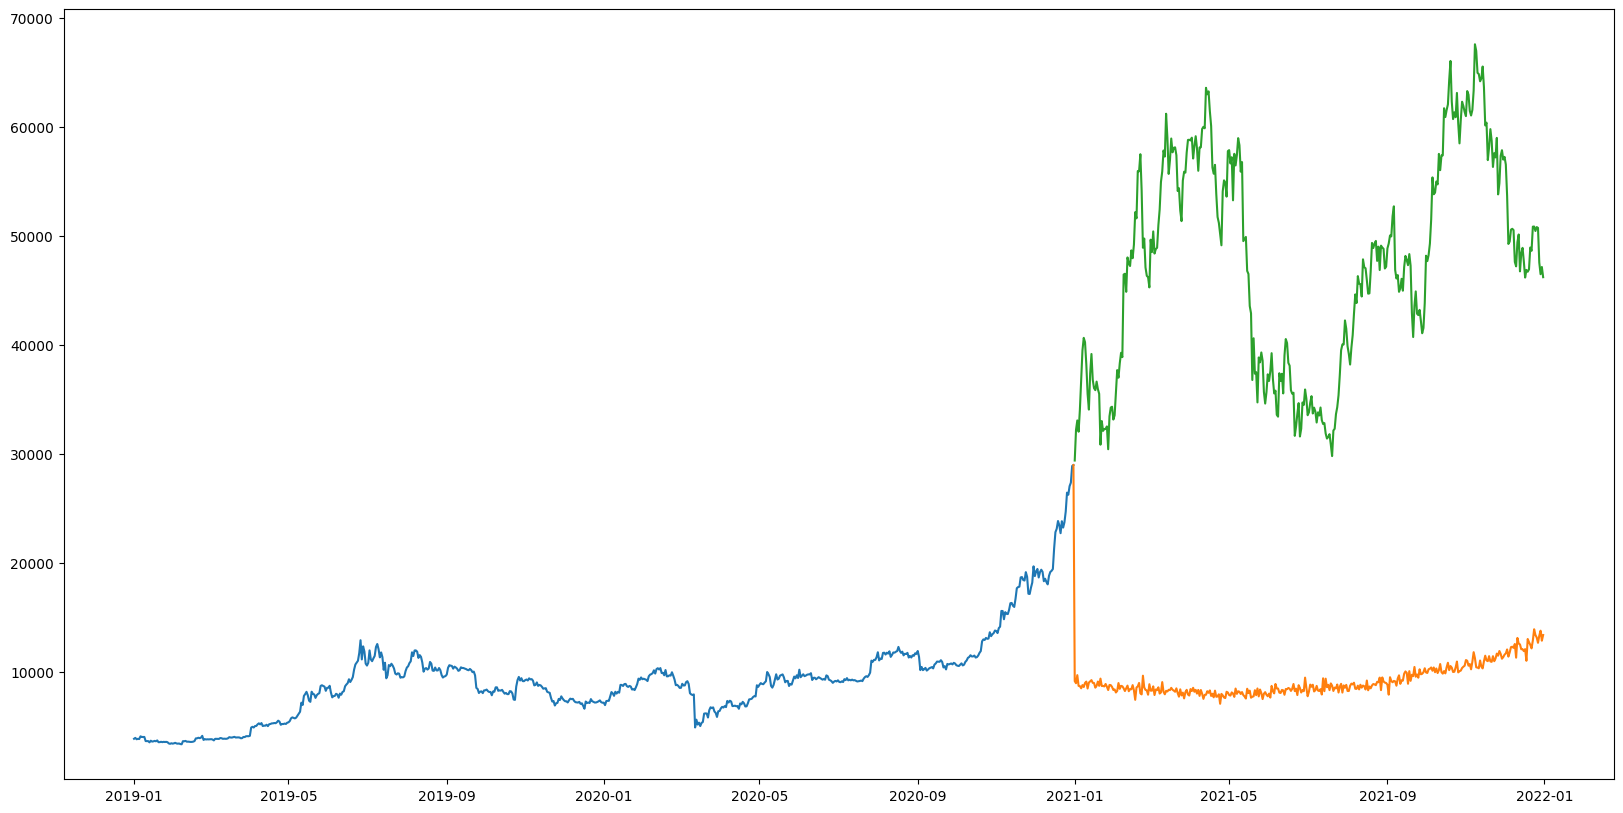

In [130]:
plt.figure(figsize=(20,10))
plt.plot(results)
plt.plot(df_real['Date'], df_real['Close'])